**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
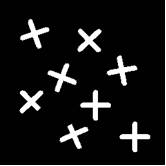
art8lab1.png: 
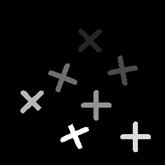
art8lab2.png: 
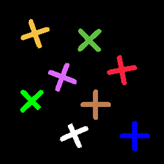
		

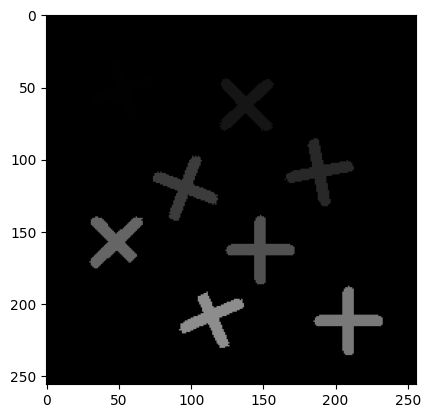

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem em escala de cinza
img = cv2.imread('art8.png', cv2.IMREAD_GRAYSCALE)

# Cria a imagem de saída com as dimensões da imagem de entrada
out = np.zeros_like(img)

# Define o valor do rótulo inicial
label = 1

# Define a lista de pontos para busca dos vizinhos
lista_proximos = []

# Define o kernel para vizinhança 8
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], np.uint8)

# Percorre a imagem em busca de pixels foreground
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        # Verifica se o pixel atual é foreground e ainda não foi rotulado
        if img[i,j] == 255 and out[i,j] == 0:
            # Atribui o rótulo à posição atual
            out[i,j] = label
            
            # Inclui na lista de busca dos vizinhos
            lista_proximos.append((i, j))
            
            # Percorre a lista de busca enquanto não estiver vazia
            while lista_proximos:
                # Busca o próximo ponto da lista
                p_atual = lista_proximos.pop(0)
                
                # Verifica a vizinhança 8 do ponto atual
                for k in range(-1, 2):
                    for l in range(-1, 2):
                        # Verifica se o pixel atual é foreground e ainda não foi rotulado
                        if img[p_atual[0]+k, p_atual[1]+l] == 255 and out[p_atual[0]+k, p_atual[1]+l] == 0:
                            # Atribui o rótulo à posição atual
                            out[p_atual[0]+k, p_atual[1]+l] = label
                            
                            # Adiciona o ponto na lista para verificar vizinhos posteriormente
                            lista_proximos.append((p_atual[0]+k, p_atual[1]+l))
            
            # Incrementa o rótulo para o próximo componente conexo
            label += 20
            
# Salva a imagem de saída
cv2.imwrite('art8lab1.png', out)
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.show()

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

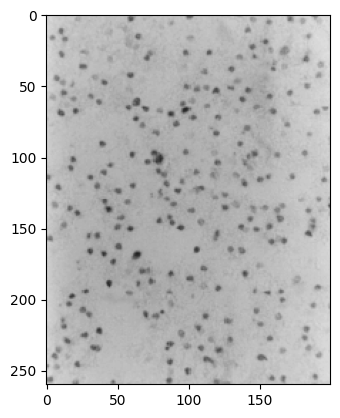

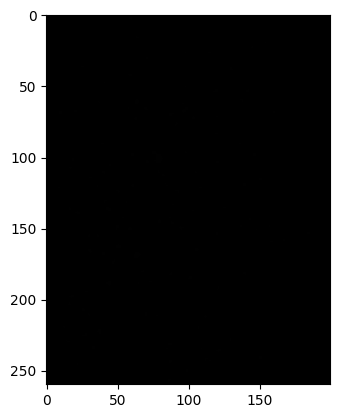

Número de objetos:  0


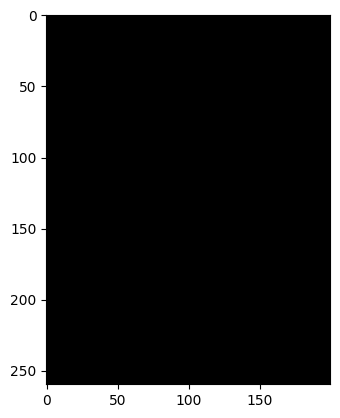

In [10]:
# code here
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem em escala de cinza
img = cv2.imread('clc3.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=67, vmax=255)
plt.show()

# Aplica limiarização na imagem

ret, thresh = cv2.threshold(img, 150, 1, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.show()
# Cria a imagem de saída com as dimensões da imagem binarizada
out = np.zeros_like(thresh)

# Define o valor do rótulo inicial
label = 1

# Define a lista de pontos para busca dos vizinhos
lista_proximos = []

# Define o kernel para vizinhança 8
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], np.uint8)

# Percorre a imagem binarizada em busca de pixels foreground
for i in range(1, thresh.shape[0]-1):
    for j in range(1, thresh.shape[1]-1):
        # Verifica se o pixel atual é foreground e ainda não foi rotulado
        if thresh[i,j] == 255 and out[i,j] == 0:
            # Atribui o rótulo à posição atual
            out[i,j] = label
            
            # Inclui na lista de busca dos vizinhos
            lista_proximos.append((i, j))
            
            # Percorre a lista de busca enquanto não estiver vazia
            while lista_proximos:
                # Busca o próximo ponto da lista
                p_atual = lista_proximos.pop(0)
                
                # Verifica a vizinhança 8 do ponto atual
                for k in range(-1, 2):
                    for l in range(-1, 2):
                        # Verifica se o pixel atual é foreground e ainda não foi rotulado
                        if thresh[p_atual[0]+k, p_atual[1]+l] == 255 and out[p_atual[0]+k, p_atual[1]+l] == 0:
                            # Atribui o rótulo à posição atual
                            out[p_atual[0]+k, p_atual[1]+l] = label
                            
                            # Adiciona o ponto na lista para verificar vizinhos posteriormente
                            lista_proximos.append((p_atual[0]+k, p_atual[1]+l))
            
            # Incrementa o rótulo para o próximo componente conexo
            label += 1
            
# Exibe o número de objetos na imagem
print("Número de objetos: ", label-1)

# Salva a imagem de saída
cv2.imwrite('clc3lab1.png', out)
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.show()